# TF Simple CNN

\- [Saurabh Mathur](https://saurabhmathur96.github.io/)

The aim of this experiment is to build a convolutional neural network to recognize handwritten digits.

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
mnist = fetch_mldata("MNIST original", data_home="/home/saurabh/Documents/python/digits/data")

X_train, X_test, y_train, y_test = train_test_split(mnist.data, label_binarize(mnist.target, classes = range(10)))

In [3]:
print ('Shape of X : {}'.format(X_train[0].shape))
print ('Shape of y : {}'.format(y_train[0].shape))

Shape of X : (784,)
Shape of y : (10,)


## Build CNN of 5 layers ( conv, bias, relu, pool, out )

In [9]:
n_input = 784
n_output = 10
stddev = 0.1

X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])


weights = {
    "wc1": tf.Variable(tf.random_normal([3, 3, 1, 64], stddev = stddev)),
    "wd1": tf.Variable(tf.random_normal([14*14*64, n_output], stddev = stddev))
}

biases = {
    "bc1": tf.Variable(tf.random_normal([64], stddev = stddev)),
    "bd1": tf.Variable(tf.random_normal([n_output], stddev = stddev))
}

def conv_net(X, weights, biases):
    X_reshaped = tf.reshape(X, shape = [-1, 28, 28, 1])
    conv1 = tf.nn.conv2d(X_reshaped, weights["wc1"],
                        strides = [1, 1, 1, 1], padding = "SAME")
    bias_add = tf.nn.bias_add(conv1, biases["bc1"])
    relu = tf.nn.relu(bias_add)
    pool = tf.nn.max_pool(relu, ksize = [1, 2, 2, 1],
                         strides = [1, 2, 2, 1], padding = "SAME")
    one_hot = tf.reshape(pool, [-1, weights["wd1"].get_shape().as_list()[0]])
    out = tf.add(tf.matmul(one_hot, weights["wd1"]), biases["bd1"])
    
    return out

## Build Model

In [10]:
learning_rate = 0.001

prediction = conv_net(X, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y))
train_step = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [15]:
n_epochs = 5
batch_size = 80
n_batches = int(X_train.shape[0] / batch_size)

np.random.seed(1)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        avg_cost = 0.0
        for _ in range(n_batches):
            indices = np.random.randint(X_train.shape[0], size=batch_size)
            sess.run(train_step, { X: X_train[indices], y: y_train[indices]})
            avg_cost += sess.run(cost, { X: X_train[indices], y: y_train[indices]}) / float(n_batches)
    
        indices = np.random.randint(X_train.shape[0], size=batch_size)
        score = sess.run(accuracy, { X: X_train[indices], y: y_train[indices]})
        print ("Epoch {0}/{1}. Cost {2:0.2f}. Accuracy {3:0.1f} %.".format(epoch + 1, n_epochs, avg_cost, 100 * score))
        indices = np.random.randint(X_test.shape[0], size=batch_size)
        score = sess.run(accuracy, { X: X_test[indices], y: y_test[indices]})
        print ("Testing Accuracy {0:0.1f} %.".format(100 * score))

Epoch 1/5. Cost 9.77. Accuracy 92.5 %.
Testing Accuracy 95.0 %.
Epoch 2/5. Cost 1.29. Accuracy 98.8 %.
Testing Accuracy 97.5 %.
Epoch 3/5. Cost 0.71. Accuracy 97.5 %.
Testing Accuracy 95.0 %.
Epoch 4/5. Cost 0.44. Accuracy 97.5 %.
Testing Accuracy 95.0 %.
Epoch 5/5. Cost 0.29. Accuracy 98.8 %.
Testing Accuracy 96.2 %.


(0, 100)

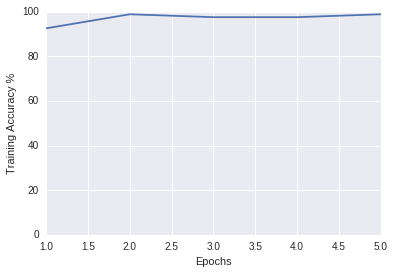

In [16]:
points = {
    "x": range(1, 6),
    "y": [92.5, 98.8, 97.5, 97.5, 98.8]
}
plt.plot(points["x"], points["y"])
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy %")
plt.ylim((0, 100))

(0, 2)

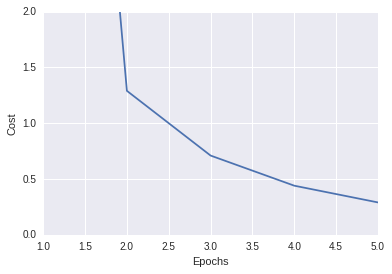

In [17]:

points = {
    "x": range(1, 6),
    "y": [9.77, 1.29, 0.71, 0.44, 0.29]
}

plt.plot(points["x"], points["y"])
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.ylim((0, 2))